In [1]:
from analysis_tools import Analyzer
from generators.storage import Lund, Block, BCType
import numpy as np
import os
import config

In [2]:
prefix = 'Lund_'

# Задание параметров блока

In [3]:
step = 0.01
n = 100
size = n * step 
mesh = np.meshgrid(np.linspace(0, size, n), np.linspace(0, size, n), np.linspace(0, size, n))
block = Block(
    shape=(n, n, n),
    mesh=(mesh[1], mesh[0], mesh[2]),
    bc=[(BCType.NotWall, BCType.NotWall), (BCType.NotWall, BCType.NotWall), (BCType.NotWall, BCType.NotWall)]
)

# Параметры поля

In [4]:
generator = Lund(
    block=block, u_av=(0., 0., 0.), l_t=0.1,
    re_xx=1., re_yy=1., re_zz=1.,
    re_xy=0., re_xz=0., re_yz=0.,
    time_arr=np.array([0])
)

In [5]:
analyzer = Analyzer(generator)

# Профиль скорости

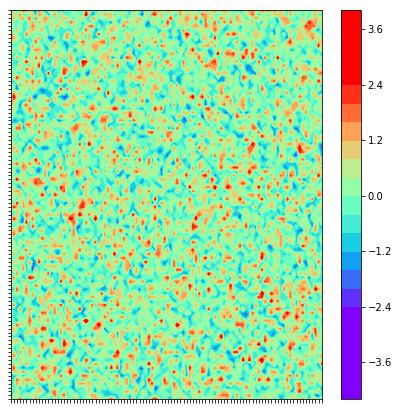

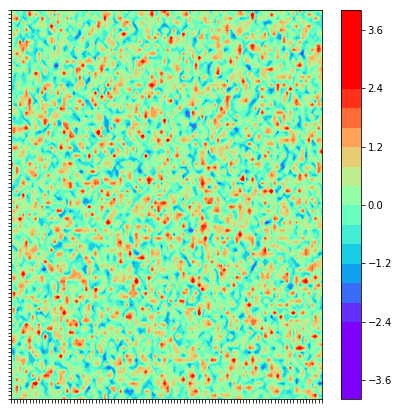

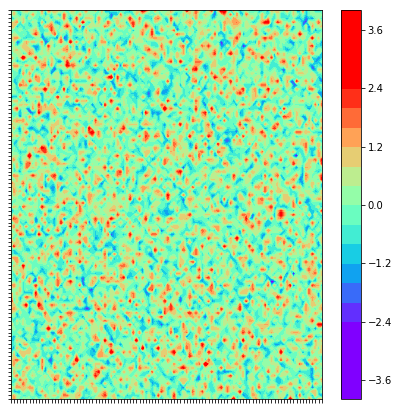

In [6]:
analyzer.plot_2d_velocity_field(
    vmin=-2.5, vmax=2.5, grid=False, num_levels=20, figsize=(6, 6), title=False, title_fsize=18, 
    fname=os.path.join(config.pic_dir, prefix + 'velocity_contour'), axes=(0.05, 0.05, 0.9, 0.9)
)

# Пульсации составляющих скорости в точке

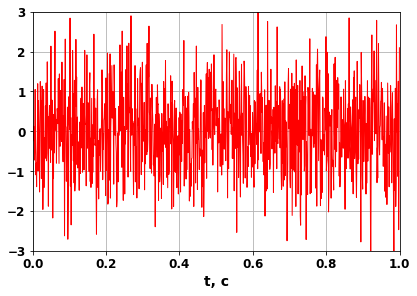

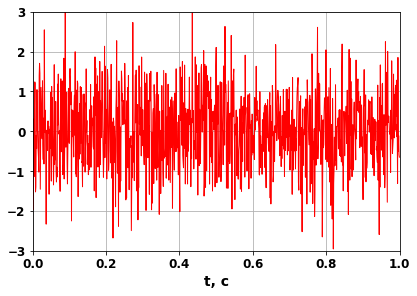

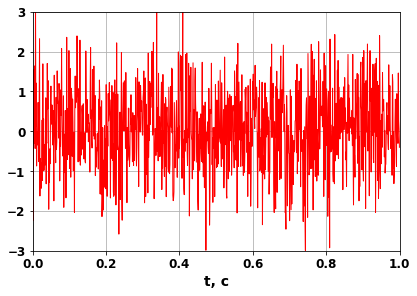

In [12]:
analyzer.plot_velocity_history(
    i=0, j=0, k=0, ts=0.001, num_ts=1000, figsize=(6, 4), ylim=(-3, 3), label_fsize=14, ticks_fsize=12, 
    title_fsize=16, title=False, fname=os.path.join(config.pic_dir, prefix + 'vel_history'), 
    axes=(0.1, 0.14, 0.85, 0.83)
)

# График вторых моментов

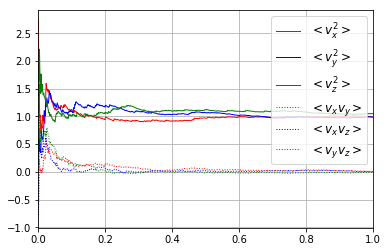

In [14]:
analyzer.plot_moments(i=0, j=0, k=0, ts=0.001, num_ts=1000, figsize=(6, 4))

# Двухточечные пространственные корреляции

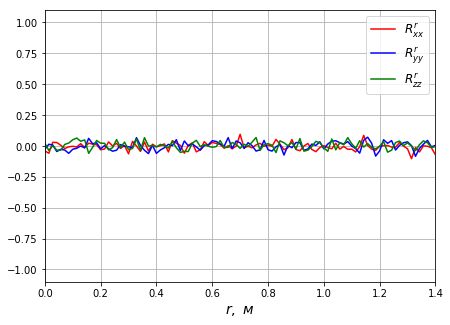

In [15]:
analyzer.plot_two_point_space_correlation(
            i0=0, j0=0, k0=0, ts=0.001, num_ts=1000, di=1, dj=1, dk=0, num=n-1, figsize=(7, 5)
        )

# Автокорреляций

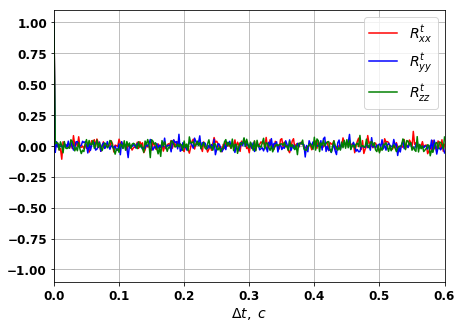

In [20]:
analyzer.plot_two_point_time_correlation(
            i=0, j=0, k=0, t0=0, t1=1.0, num_dt_av=500, num_dt=300, figsize=(7, 5)
        )

# Двумерный спектр

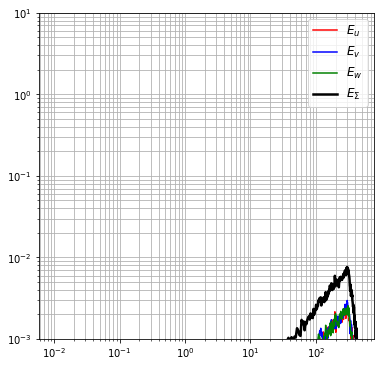

In [23]:
analyzer.plot_spectrum_2d(num_pnt=200, figsize=(6, 6))

# Трехмерный спектр

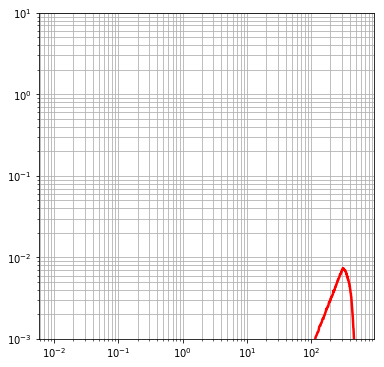

In [24]:
analyzer.plot_spectrum_3d(num_pnt=200, figsize=(6, 6))